In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
dfsolo = pd.read_csv('dfsolo.csv') 
dfduo = pd.read_csv('dfduo.csv')
dfsquad = pd.read_csv('dfsquad.csv')

#In the cleaning notebook, I divided the datasets into solo, duo, and squad mode, and downlaoded them as csv files.

In [7]:
first = dfsolo.player_survive_time > 25

In [9]:
print(dfsolo[first].count() / len(dfsolo)) #1. Only 20% of the top 50 players will make it past 25 minutes in a match.

team_placement         0.195793
player_dist_walk       0.195793
player_dmg             0.195793
player_dist_ride       0.195793
player_survive_time    0.195793
game_size              0.195793
party_size             0.195793
player_kills           0.195793
dtype: float64


In [6]:
kills_mean = dfsolo.groupby('team_placement')['player_kills'].mean().head(15) 
print(kills_mean)

team_placement
1     7.507463
2     3.166667
3     3.089552
4     2.611940
5     2.529412
6     2.753846
7     2.476923
8     1.941176
9     2.250000
10    2.029412
11    1.359375
12    1.707692
13    1.567164
14    1.250000
15    1.569231
Name: player_kills, dtype: float64


**2) Grouping by team placement, and averaging the total damage of players, we can observe a positive correlation between higher team placement and player kills, with first place holding an average of 4 more kills than second place in a solo match**

In [14]:
from matplotlib.pyplot import savefig #allows easy download of graphs into photos

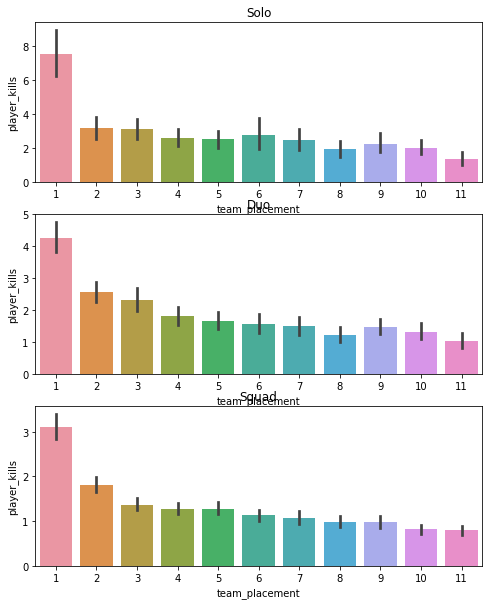

In [8]:
                    
fig = plt.figure(figsize = (8, 10)) #3
plt.subplot(3, 1, 1) #3

plt.title('Solo')
sns.barplot(x='team_placement', y='player_kills', data=dfsolo[(dfsolo.team_placement < 12)]) #3

plt.subplot(3, 1, 2)
plt.title('Duo')
plt.xlabel('Team Placement')

sns.barplot(x='team_placement', y='player_kills', data=dfduo[(dfduo.team_placement < 12)])

plt.subplot(3, 1, 3)
plt.title('Squad')

sns.barplot(x='team_placement', y='player_kills', data=dfsquad[(dfsquad.team_placement < 12)])

(0, 4500)

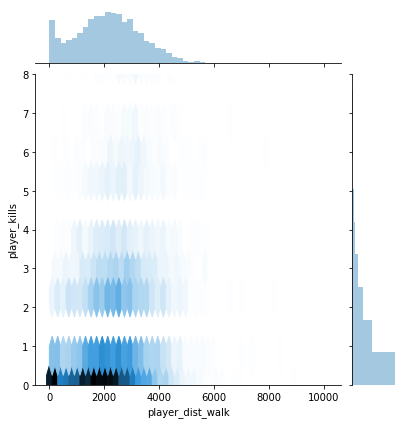

In [9]:
joint = sns.jointplot(x='player_dist_walk', y='player_kills', data=dfsquad, kind='hex') #4
plt.ylim(0, 8)
plt.xlim(0, 4500)

C:\Users\Ameen\Miniconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Ameen\Miniconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Ameen\Miniconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


Text(0.0, 1.0, 'Squad')

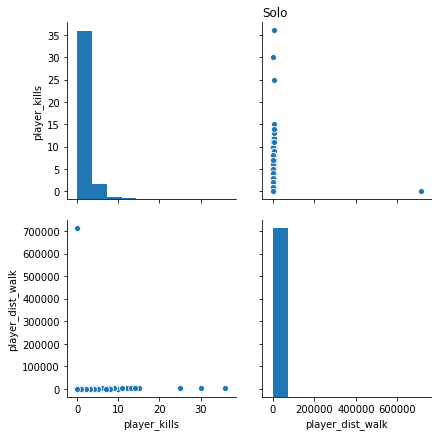

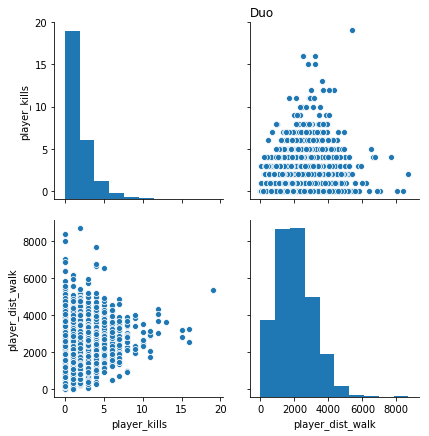

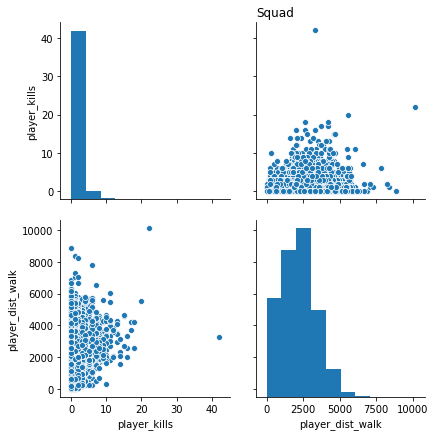

In [10]:


sns.pairplot(dfsolo[['player_kills', 'player_dist_walk']], size=3) 
plt.title('Solo', loc='left')

sns.pairplot(dfduo[['player_kills', 'player_dist_walk']], size=3)
plt.title('Duo', loc='left')

sns.pairplot(dfsquad[['player_kills', 'player_dist_walk']], size=3)
plt.title('Squad', loc='left')

#4 Most of the killings happen within the first 2000 feet of player movement

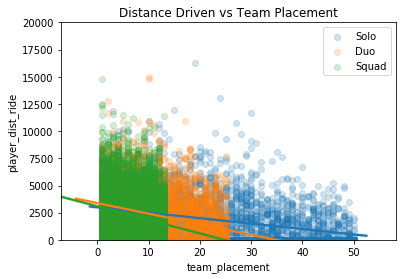

In [15]:
#5
f, ax = plt.subplots(1, 1)
sns.regplot(x='team_placement', y='player_dist_ride', data=dfsolo, label ='Solo', scatter_kws={'alpha':0.2})

sns.regplot(x='team_placement', y='player_dist_ride', data=dfduo, label ='Duo', scatter_kws={'alpha':0.2})

sns.regplot(x='team_placement', y='player_dist_ride', data=dfsquad, label ='Squad', scatter_kws={'alpha':0.2})

plt.ylim(0, 20000)
plt.title('Distance Driven vs Team Placement')
ax.legend()

savefig( 'distancedriven_vsteamp.png', dpi=400 )

In [12]:
a = dfsolo.set_index('player_survive_time') #changing the index to survival time and sorting them for question 6
a.sort_values(by=['player_survive_time'])

amean= a.groupby('player_survive_time')['player_kills'].mean()

ameanx = pd.DataFrame(amean)


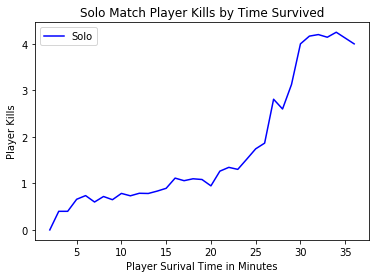

In [16]:
#6

plt.title('Solo Match Player Kills by Time Survived')
plt.xlabel('Player Surival Time in Minutes')
plt.ylabel('Player Kills')
plt.plot(ameanx['player_kills'], color='blue', label='Solo')

plt.legend(loc='upper left')

 #A time series plot
    
savefig( 'survivaltime_vs_meankills.png', dpi=400 )